In [1]:
import torch
from script.NeuralNets.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset
from script.NeuralNets.trainFunction import train_sequential_2
from script.eval import Plots_for
from script.NeuralNets.testFunction import test_sequential
from script.DHOV.Normalisation import get_std, get_mean, normalize_nn, normalize_data
import torchvision as tv
import matplotlib

from matplotlib import pyplot as plt


In [2]:
def plot_2d(nn, included, ambient):
    included_out_x = []
    included_out_y = []
    for x in included:
        x = torch.unsqueeze(x, dim=0)
        out = nn(x)
        included_out_x.append(out[0][0].item())
        included_out_y.append(out[0][1].item())
    ambient_out_x = []
    ambient_out_y = []
    for x in ambient:
        x = torch.unsqueeze(x, dim=0)
        out = nn(x)
        ambient_out_x.append(out[0][0].item())
        ambient_out_y.append(out[0][1].item())

    plt.scatter(included_out_x, included_out_y)
    plt.scatter(ambient_out_x, ambient_out_y)
    plt.show()

In [3]:
epochs = 10
batch_size = 10
number_of_train_samples = 10000
hyper_lambda = 0.1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]
non_normalized_nn= SequentialNN([2, 2, 2])
normalized_nn = SequentialNN([2, 2, 2])

In [4]:
true_extremal_points = [[0,0]]

#matplotlib.use('TkAgg')
ambient_space = torch.load("../../ambient_space_after_relu.pt", weights_only=True)
included_space = torch.load("../../included_space_after_relu.pt", weights_only=True)

In [5]:
# normalisation included in the first layer of the network

mean = get_mean(included_space, ambient_space)
print(mean)

std = get_std(included_space, ambient_space)
print(std)

included_space_transform, ambient_space_transform = normalize_data(included_space,  ambient_space, mean, std)


dataset = ConvexDataset(data=included_space_transform)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data=ambient_space_transform)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

tensor([1.1811, 2.3670], dtype=torch.float64, requires_grad=True)
tensor([0.0010, 0.0010], dtype=torch.float64, requires_grad=True)


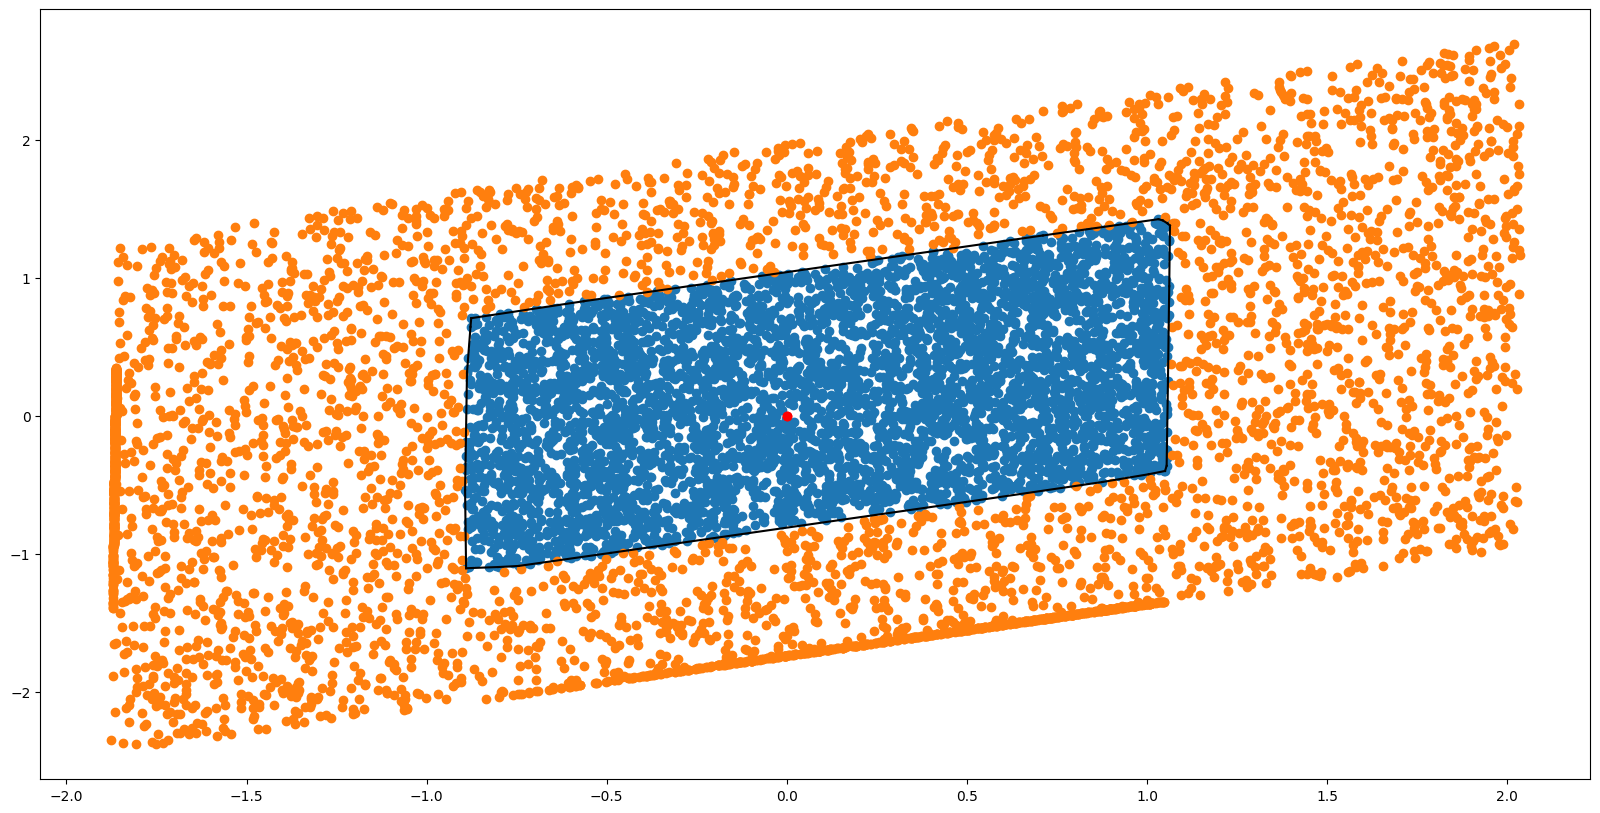

In [6]:
#normalize_nn(non_normalized_nn, mean, std)
plots = Plots_for(0, non_normalized_nn, included_space_transform.detach(), ambient_space_transform.detach(), x_range, y_range, extr=true_extremal_points)
plots.plt_initial()

=== Epoch: 0===
batch = 0, mean loss = 1.212563423326036
batch = 100, mean loss = 1.158345478745132
batch = 200, mean loss = 1.1069065717480577
batch = 300, mean loss = 1.0548977679890674
batch = 400, mean loss = 1.0012327998771438
batch = 500, mean loss = 0.9490586024232122
=== Epoch: 1===
batch = 0, mean loss = 0.6621448352527731
batch = 100, mean loss = 0.6731506214290486
batch = 200, mean loss = 0.626540206256541
batch = 300, mean loss = 0.5856798686761081
batch = 400, mean loss = 0.5440186996411498
batch = 500, mean loss = 0.4977436694819473
=== Epoch: 2===
batch = 0, mean loss = 0.16193406821334713
batch = 100, mean loss = 0.22564846807694774
batch = 200, mean loss = 0.19289869831959255
batch = 300, mean loss = 0.17588956543145856
batch = 400, mean loss = 0.15946214213448529
batch = 500, mean loss = 0.14868324740979305
=== Epoch: 3===
batch = 0, mean loss = 0.12466821059893503
batch = 100, mean loss = 0.08456541649782474
batch = 200, mean loss = 0.08710327712803131
batch = 300, m

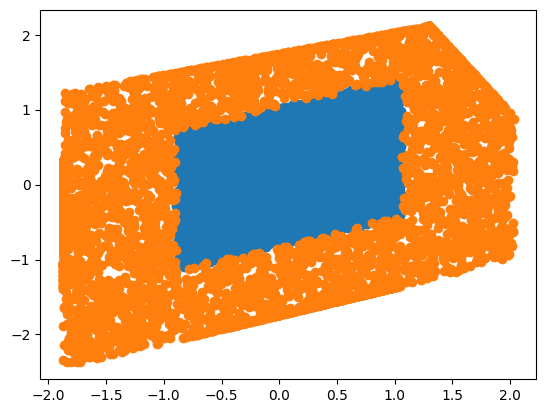

In [7]:
train_sequential_2(non_normalized_nn, train_loader, ambient_loader, epochs=epochs)
plot_2d(non_normalized_nn, included_space_transform, ambient_space_transform)

In [8]:
test_sequential(non_normalized_nn, train_loader, ambient_loader)

dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data=ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

normalized_nn.load_state_dict(non_normalized_nn.state_dict())

normalize_nn(normalized_nn, mean, std)

test_sequential(normalized_nn, train_loader, ambient_loader)

test run 500 iterations,  with mean loss = 0.011351901031701667
test run 500 iterations,  with mean loss = 0.9360305689922456


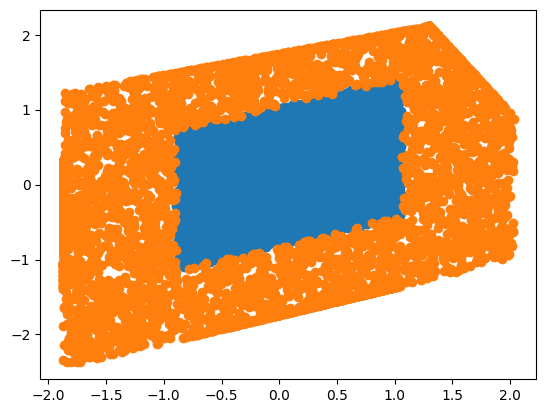

In [9]:
plot_2d(normalized_nn, included_space, ambient_space)